In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Analysis #1

Hypothetical Context: In the face of budget and funding criticism, we need to preserve free or reduced lunches for students that need it as it is a key factor in student success (as measured by math test scores).  Math scores was chosen here as it is the best language/ethnic agnostic measure as compared to reading and writing.

Null Hypothesis: There is no difference in average/mean math scores between Students that have standard lunch and students that receive a free/reduced lunch.
Alternative Hypothesis: There is a difference in mean math test scores between the two groups.

This analysis serves to indicate whether changes to the lunch program need to be made or if additional support is needed for these students.


For this analysis, the technique we will use is the two-sample t-test

In [22]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [23]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
#extract 200 samples, degrees of freedom = 199

standard_lunch = data['math score'].loc[data['lunch'] == 'standard'].sample(n = 100, random_state=72, replace=False)
lunch_program = data['math score'].loc[data['lunch'] == 'free/reduced'].sample(n = 100, random_state=72, replace=False)

Text(0.5, 1.0, 'Independent Sample T-Test')

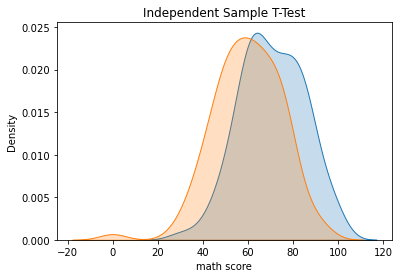

In [54]:
# lets plot our samples


# ax1 = sns.displot(lunch_program)
# ax2 = sns.displot(standard_lunch)

sns.kdeplot(standard_lunch, shade=True)
sns.kdeplot(lunch_program, shade=True)
plt.title("Independent Sample T-Test")

In [55]:
# we will be using a confidence interval of 95% or an alpha of 0.05

#find critical value for our sample and hypothesis params
critical_value = stats.t.ppf(q = 0.95, df = 199)
print(critical_value)

np.random.seed(12)
stat, p_value = stats.ttest_ind(standard_lunch, lunch_program, equal_var=False)
print("t-statistic is: {}".format(stat))
print("p-value is: {}".format(p_value))

p_value > 0.05

1.652546746165939
t-statistic is: 5.226136008999753
p-value is: 4.385978776358517e-07


False

Given that the t-statistic of 5.22 is greather than the critical value of 1.652 AND p-value is significantly smaller than our alpha (probability that we observe our results), we reject the Null hypothesis. 